In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

## Data Exploration

In [2]:
# load dataset
df_train = pd.read_csv('dataset/house_prices/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# check for duplicates based on Id
uniqueId = len(set(df_train.Id))
total_rows = df_train.shape[0]
duplicates = total_rows - uniqueId
print(duplicates)

0


In [6]:
# drop Id column
df_train.drop(columns=['Id'], axis=1, inplace=True) #need inplace = True or reasign to a new df for the change to take affect
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Explore the Target Variable

In [7]:
# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

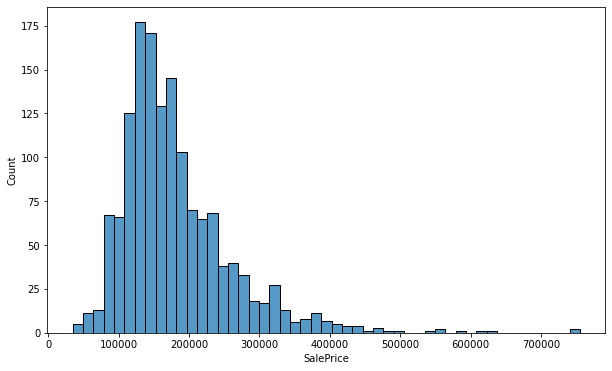

In [8]:
# histogram
plt.figure(figsize=(10,6))
sns.histplot(df_train.SalePrice);

In [9]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [10]:
# numerical features
num_feats = df_train.dtypes[df_train.dtypes != object]
num_feats

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

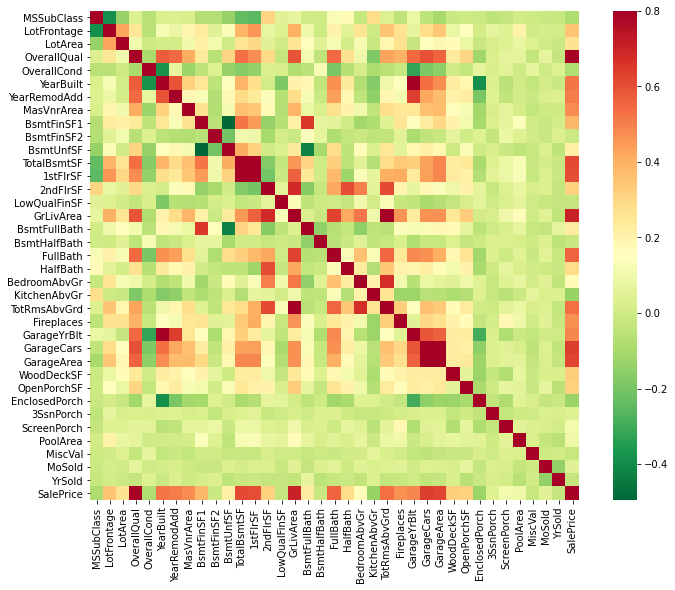

In [11]:
# plot a correlation matrix (numerical variables) to see which variables are most correlated to Sale Price
corr_mat = df_train.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.8, square=True, cmap='RdYlGn_r');

In [12]:
# choose features which are highly correlated to SalePrice
corr_mat.SalePrice[abs(corr_mat.SalePrice > 0.5)]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

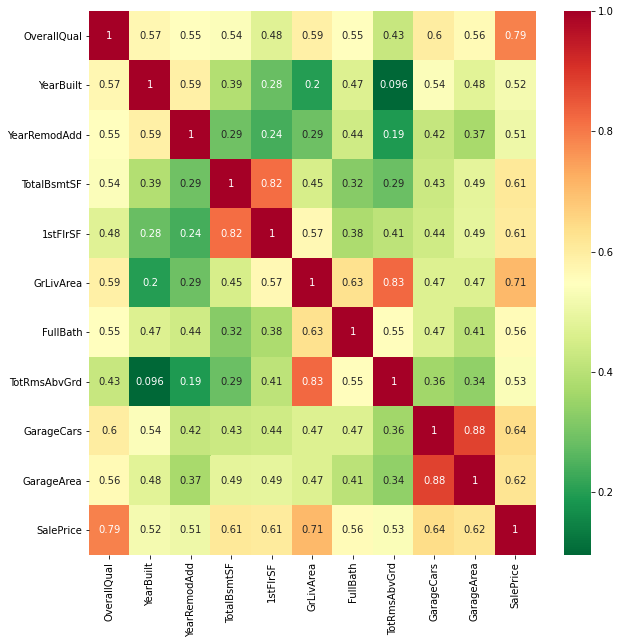

In [13]:
# plot only the most correlated features with the Sale Price
plt.figure(figsize=(10,10))
top_corr_features = corr_mat.index[abs(corr_mat['SalePrice'])>0.5]
sns.heatmap(df_train[top_corr_features].corr(), annot=True, cmap='RdYlGn_r');

Sale Price is highly correlated to:
- OverallQual
- GrLivArea (this is correlated to TotRmsAbvGrd)
- TotalBsmtSF and 1stFlrSF (these two are correlated)
- GarageCars and GarageArea (these two are correlated)
- YearBuilt
- YearRemodAdd

In [14]:
# plot the highly correlated variables with respect to Sale Price
def plot_num_feats(x):
    count = len(x)
    fig, ax = plt.subplots(1, count, figsize=(30, 6))
    plot_num = 0
    for var in x:
        data = df_train[['SalePrice', var]]
        data.plot.scatter(ax=ax[plot_num], x=var, y='SalePrice')
        plot_num += 1

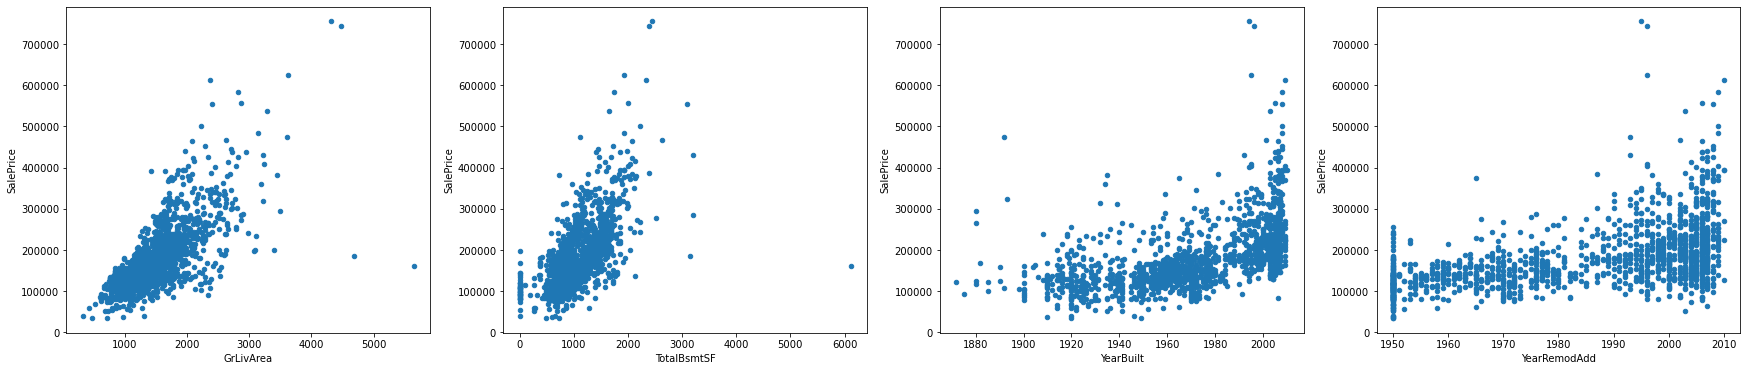

In [15]:
plot_num_feats(['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd'])

In [16]:
# plot the highly correlated variables with respect to Sale Price
def plot_cat_feats(x):
    count = len(x)
    fig, ax = plt.subplots(1, count, figsize=(30, 6))
    plot_num = 0
    for var in x:
        data = df_train[['SalePrice', var]]
        sns.boxplot(ax=ax[plot_num], x=df_train[var], y=df_train['SalePrice'])
        plot_num += 1

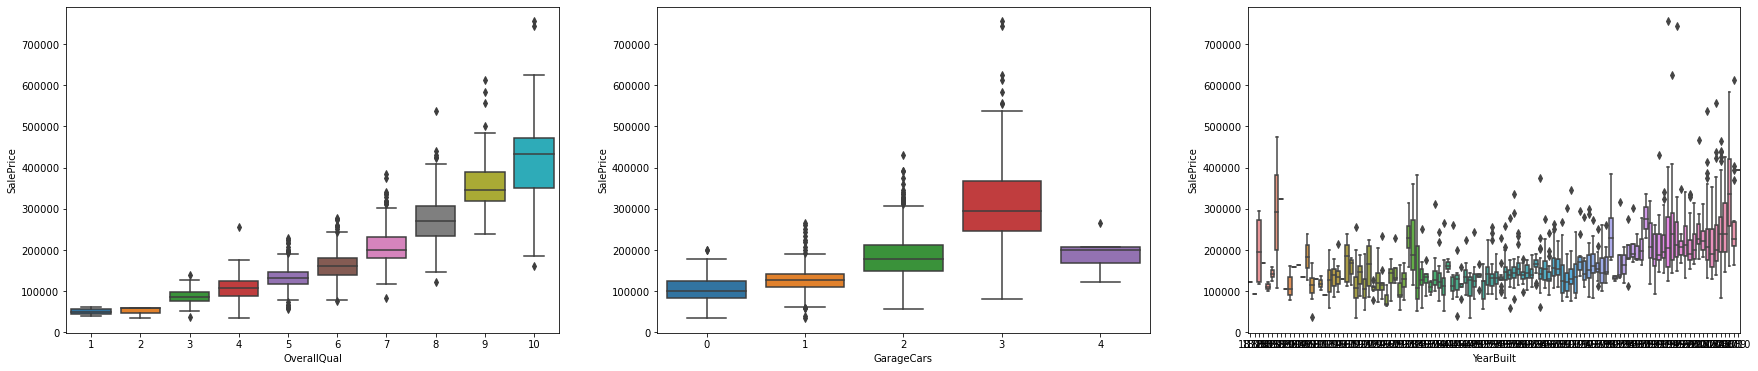

In [17]:
plot_cat_feats(['OverallQual', 'GarageCars', 'YearBuilt'])

In [18]:
# categorical features
cat_feats = df_train.dtypes[df_train.dtypes == object]
cat_feats

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [19]:
# check to see sum equals the total number of columns
len(num_feats + cat_feats)

80

## Outlier Detection

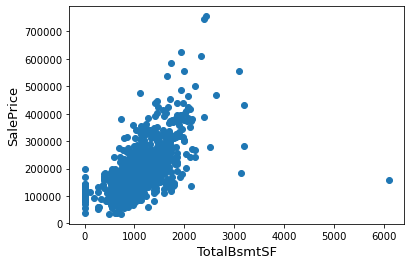

In [20]:
fig, ax = plt.subplots()
ax.scatter(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

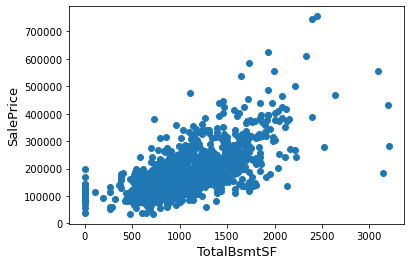

In [21]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

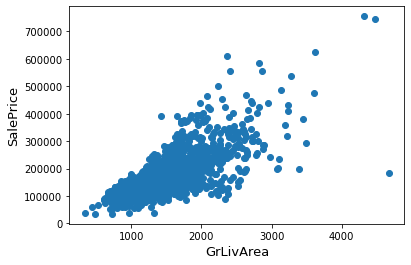

In [22]:
fig, ax = plt.subplots()
ax.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

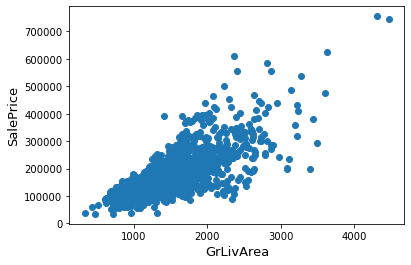

In [23]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig,ax = plt.subplots()
ax.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Null Value Replacement

In [24]:
# check for missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_df.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


In [25]:
# drop 5 columns where a significant portion of the data is missing
to_drop = missing_data_df.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [26]:
# extract the names of columns with missing data
cols_with_missing = missing_data_df[missing_data_df.Percent > 0].index.tolist()

# remove the column names that were removed
missing_cols = list(set(cols_with_missing) - set(to_drop))

# check datatypes
df_train.dtypes[missing_cols]

GarageQual       object
MasVnrArea      float64
BsmtExposure     object
BsmtQual         object
MasVnrType       object
BsmtCond         object
LotFrontage     float64
Electrical       object
GarageYrBlt     float64
BsmtFinType1     object
GarageCond       object
BsmtFinType2     object
GarageFinish     object
GarageType       object
dtype: object

#### Null Value Replacement - Numeric Variables

In [27]:
# select numeric columns from missing_cols
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist() 

# create a new variable with the information that it was missing
for col in num_cols_with_missing:
    df_train[col + '_missing_ind'] = 0
    df_train.loc[df_train[col].isnull(), col + '_missing_ind'] = 1 # add 1 if the original column had missing data

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrArea_missing_ind,LotFrontage_missing_ind,GarageYrBlt_missing_ind
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0,0,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,0,0,0


In [28]:
# Replace null values
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].min())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

#### Null Value Replacement - Object (String) Variables

In [29]:
# select categorical columns from missing_cols
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()
cat_cols_with_missing

['GarageQual',
 'BsmtExposure',
 'BsmtQual',
 'MasVnrType',
 'BsmtCond',
 'Electrical',
 'BsmtFinType1',
 'GarageCond',
 'BsmtFinType2',
 'GarageFinish',
 'GarageType']

In [30]:
# use the data documentation to fill in missing values appropriately

# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

# information about Electrical and MasVnrType is missing
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [31]:
# check to see if all null values have been replaced
df_train.isnull().sum().sum()

0

## Value Transformation

#### Value Transformation - Numeric Variables

In [32]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()

/Users/pavneetbajwa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

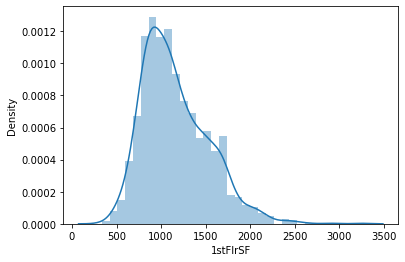

In [33]:
sns.distplot(df_train['1stFlrSF'])

/Users/pavneetbajwa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1stFlrSF_log', ylabel='Density'>

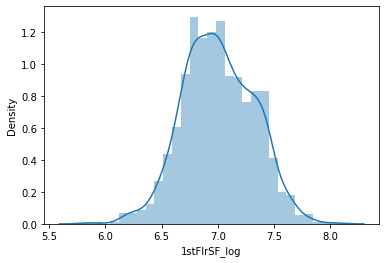

In [34]:
# Apply log transformation
df_train['1stFlrSF_log'] = df_train['1stFlrSF'].apply(np.log)
sns.distplot(df_train['1stFlrSF_log'])

In [35]:
# Scale the data so that the values are between 0 and 1 (important for many algorithms)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+['1stFlrSF_log']].astype(float))) # new df with only numeric cols

In [36]:
# fit_transform returns data type numpy.array
# once the results are converted back to Pandas DataFrame there won't be any original column names. 
# add column names using DataFrame attribute .columns

df_train_scaled.columns = num_feats+['1stFlrSF_log']

In [37]:
df_train_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MasVnrArea_missing_ind,LotFrontage_missing_ind,GarageYrBlt_missing_ind,1stFlrSF_log
0,0.073426,-0.228085,-0.203934,0.658506,-0.517649,1.052959,0.880362,0.523937,0.617283,-0.288867,...,-0.270407,-0.063709,-0.087748,-1.601578,0.138375,0.346896,-0.074278,-0.464772,-0.242536,-0.806414
1,-0.871868,0.485078,-0.087252,-0.068293,2.177825,0.158428,-0.428115,-0.570739,1.245719,-0.288867,...,-0.270407,-0.063709,-0.087748,-0.490155,-0.614427,0.007136,-0.074278,-0.464772,-0.242536,0.428328
2,0.073426,-0.085453,0.080162,0.658506,-0.517649,0.986698,0.831900,0.334044,0.108989,-0.288867,...,-0.270407,-0.063709,-0.087748,0.991743,0.138375,0.535652,-0.074278,-0.464772,-0.242536,-0.577066
3,0.309749,-0.465806,-0.092325,0.658506,-0.517649,-1.862551,-0.718888,-0.570739,-0.514826,-0.288867,...,-0.270407,-0.063709,-0.087748,-1.601578,-1.367230,-0.515088,-0.074278,-0.464772,-0.242536,-0.438379
4,0.073426,0.675255,0.385566,1.385305,-0.517649,0.953567,0.734975,1.384039,0.499451,-0.288867,...,-0.270407,-0.063709,-0.087748,2.103167,0.138375,0.869120,-0.074278,-0.464772,-0.242536,0.118856


#### Value Transformation - Object (String) Variables - Ordinal Mapping

In [38]:
# map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                           "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                           "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                             "ALQ" : 5, "GLQ" : 6},
                           "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                           "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
                           "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                           "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                           "Street" : {"Grvl" : 1, "Pave" : 2},
                           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                         )

#### Value Transformation - Object (String) Variables - Categorical (Nominal) Mapping

In [39]:
# create dummy variables (one-hot encoding)
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

In [40]:
df_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


## Feature Engineering

#### Feature Engineering - Combination of Existing Features

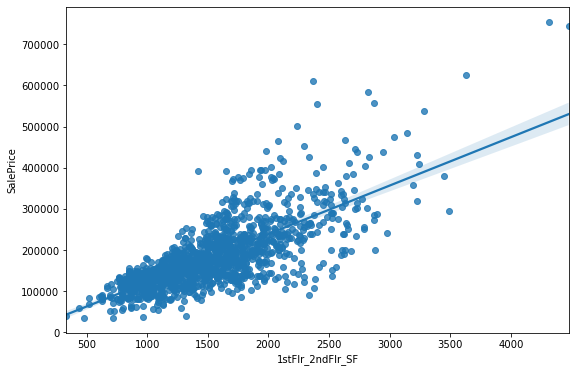

In [41]:
# create new variable for total square footage
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']

fig, ax = plt.subplots(figsize=(9, 6))

# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)
plt.show()

In [42]:
# create a new feature OverallGrade for overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]

#### Feature Engineering - Simplification of Existing Features

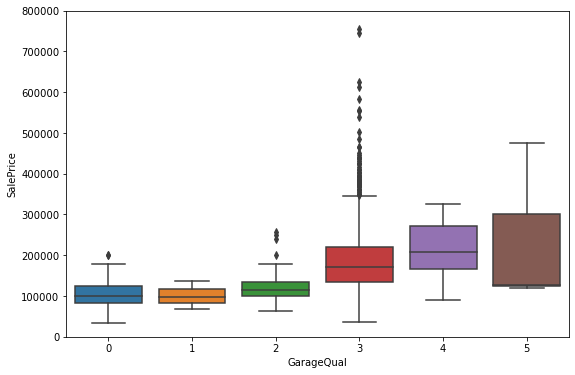

In [43]:
var = 'GarageQual'
fig, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

In [44]:
# merge categories 0, 1, 2 as there is not much change in sale price among these categories
df_train["SimplGarageQual"] = df_train.GarageQual.replace({
                                                     0 : 0, # bad
                                                     1 : 0, # bad
                                                     2 : 0, # bad
                                                     3 : 1, # average
                                                     4 : 2, # good
                                                     5 : 2  # good
                                                    })

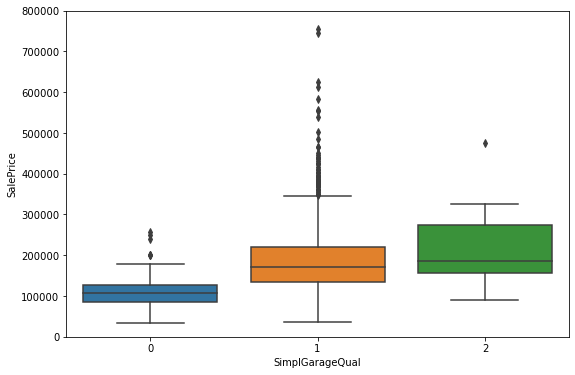

In [45]:
var = 'SimplGarageQual'
fig, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.show()

In [46]:
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]

In [47]:
df_numeric

,MSSubClass,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,MoSold,YrSold,SalePrice,MasVnrArea_missing_ind,LotFrontage_missing_ind,GarageYrBlt_missing_ind,1stFlrSF_log,1stFlr_2ndFlr_SF,OverallGrade,SimplGarageQual
0,60,65.0,8450,2,4,4,3,7,5,2003,...,2,2008,208500,0,0,0,6.752270,1710,35,1
1,20,80.0,9600,2,4,4,3,6,8,1976,...,5,2007,181500,0,0,0,7.140453,1262,48,1
2,60,68.0,11250,2,3,4,3,7,5,2001,...,9,2008,223500,0,0,0,6.824374,1786,35,1
3,70,60.0,9550,2,3,4,3,7,5,1915,...,2,2006,140000,0,0,0,6.867974,1717,35,1
4,60,84.0,14260,2,3,4,3,8,5,2000,...,12,2008,250000,0,0,0,7.043160,2198,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,62.0,7917,2,4,4,3,6,5,1999,...,8,2007,175000,0,0,0,6.859615,1647,30,1
1454,20,85.0,13175,2,4,4,3,6,6,1978,...,2,2010,210000,0,0,0,7.636752,2073,36,1
1455,70,66.0,9042,2,4,4,3,7,9,1941,...,5,2010,266500,0,0,0,7.080026,2340,63,1
1456,20,68.0,9717,2,4,4,3,5,6,1950,...,4,2010,142125,0,0,0,6.982863,1078,30,1


## Variable Selection
 - small variance
 - one of each pair of features, which are correlated together more than x

In [48]:
# separate out target variable
y = df_numeric['SalePrice']
df_numeric = df_numeric.drop('SalePrice', axis=1)

#### Variable Selection - Part I: Removing Features with Small Variance

In [49]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_numeric) # remove columns that have low variance (small predictive power)
df_transformed.shape # this is a numpy array at this point

(1458, 50)

In [50]:
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_numeric.columns[vt.get_support()]

# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

In [51]:
df_transformed.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage_missing_ind,1stFlr_2ndFlr_SF,OverallGrade
0,60.0,65.0,8450.0,4.0,7.0,5.0,2003.0,2003.0,196.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0.0,1710.0,35.0
1,20.0,80.0,9600.0,4.0,6.0,8.0,1976.0,1976.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0.0,1262.0,48.0
2,60.0,68.0,11250.0,3.0,7.0,5.0,2001.0,2002.0,162.0,4.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,0.0,1786.0,35.0
3,70.0,60.0,9550.0,3.0,7.0,5.0,1915.0,1970.0,0.0,3.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,0.0,1717.0,35.0
4,60.0,84.0,14260.0,3.0,8.0,5.0,2000.0,2000.0,350.0,4.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,0.0,2198.0,40.0


#### Variable Selection - Part II: Removing Correlated Features
 1. Calculate a correlation matrix
 2. Get pairs of highly correlated features
 3. Remove correlated columns

In [54]:
# step 1
df_corr = df_transformed.corr().abs()

# step 2
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [55]:
# check correlated columns
print(indices)

[('TotalBsmtSF', '1stFlrSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', '1stFlr_2ndFlr_SF'), ('TotRmsAbvGrd', '1stFlr_2ndFlr_SF'), ('GarageCars', 'GarageArea'), ('GarageQual', 'GarageCond')]


#### Variable Selection - Part III: Forward Regression
 - select K-best features using the forward wrapper method

In [56]:
from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k=10)
X = skb.fit_transform(df_transformed, y)

In [60]:
# transform X back to a dataframe
# this will give us the position of top 10 columns
skb.get_support()
# column names
df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=df_transformed.columns[skb.get_support()])

In [61]:
X

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade
0,7.0,2003.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0
1,6.0,1976.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0
2,7.0,2001.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0
3,7.0,1915.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0
4,8.0,2000.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0
...,...,...,...,...,...,...,...,...,...,...
1453,6.0,1999.0,3.0,4.0,953.0,1647.0,2.0,3.0,2.0,30.0
1454,6.0,1978.0,3.0,4.0,1542.0,2073.0,2.0,3.0,2.0,36.0
1455,7.0,1941.0,5.0,3.0,1152.0,2340.0,2.0,4.0,1.0,63.0
1456,5.0,1950.0,3.0,3.0,1078.0,1078.0,1.0,4.0,1.0,30.0


In [67]:
# create a final dataframe for modelling
data = X.copy()
data['SalePrice'] = y

In [68]:
data

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,OverallGrade,SalePrice
0,7.0,2003.0,4.0,4.0,856.0,1710.0,2.0,4.0,2.0,35.0,208500
1,6.0,1976.0,3.0,4.0,1262.0,1262.0,2.0,3.0,2.0,48.0,181500
2,7.0,2001.0,4.0,4.0,920.0,1786.0,2.0,4.0,2.0,35.0,223500
3,7.0,1915.0,3.0,3.0,756.0,1717.0,1.0,4.0,3.0,35.0,140000
4,8.0,2000.0,4.0,4.0,1145.0,2198.0,2.0,4.0,3.0,40.0,250000
...,...,...,...,...,...,...,...,...,...,...,...
1453,6.0,1999.0,3.0,4.0,953.0,1647.0,2.0,3.0,2.0,30.0,175000
1454,6.0,1978.0,3.0,4.0,1542.0,2073.0,2.0,3.0,2.0,36.0,210000
1455,7.0,1941.0,5.0,3.0,1152.0,2340.0,2.0,4.0,1.0,63.0,266500
1456,5.0,1950.0,3.0,3.0,1078.0,1078.0,1.0,4.0,1.0,30.0,142125


In [71]:
# save dataframe to a .csv file to be used later for modelling
data.to_csv('data.csv', index=False)